In [7]:
!pip install scikit-learn
!pip install scikit-image
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4f/d7/3303f11188122f66c940056f162d030992e7fbc9c702869bab163e85156b/matplotlib-3.7.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/d8/23/8d968922459b1c8a2c6ffca28fac00324b06b3a0633be2a39b0b1c3f84ab/contourpy-1.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/07/fb/c507a09ab93642224417c31a3acd2806bfa53f4d723cf5d6cbdf62f2f337/fonttools-4.42.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 8.8 MB/s eta 0:00:00
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/17/ba/17a706b232308e65f57deeccae503c268292e6a091313f6ce833a23093

In [8]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

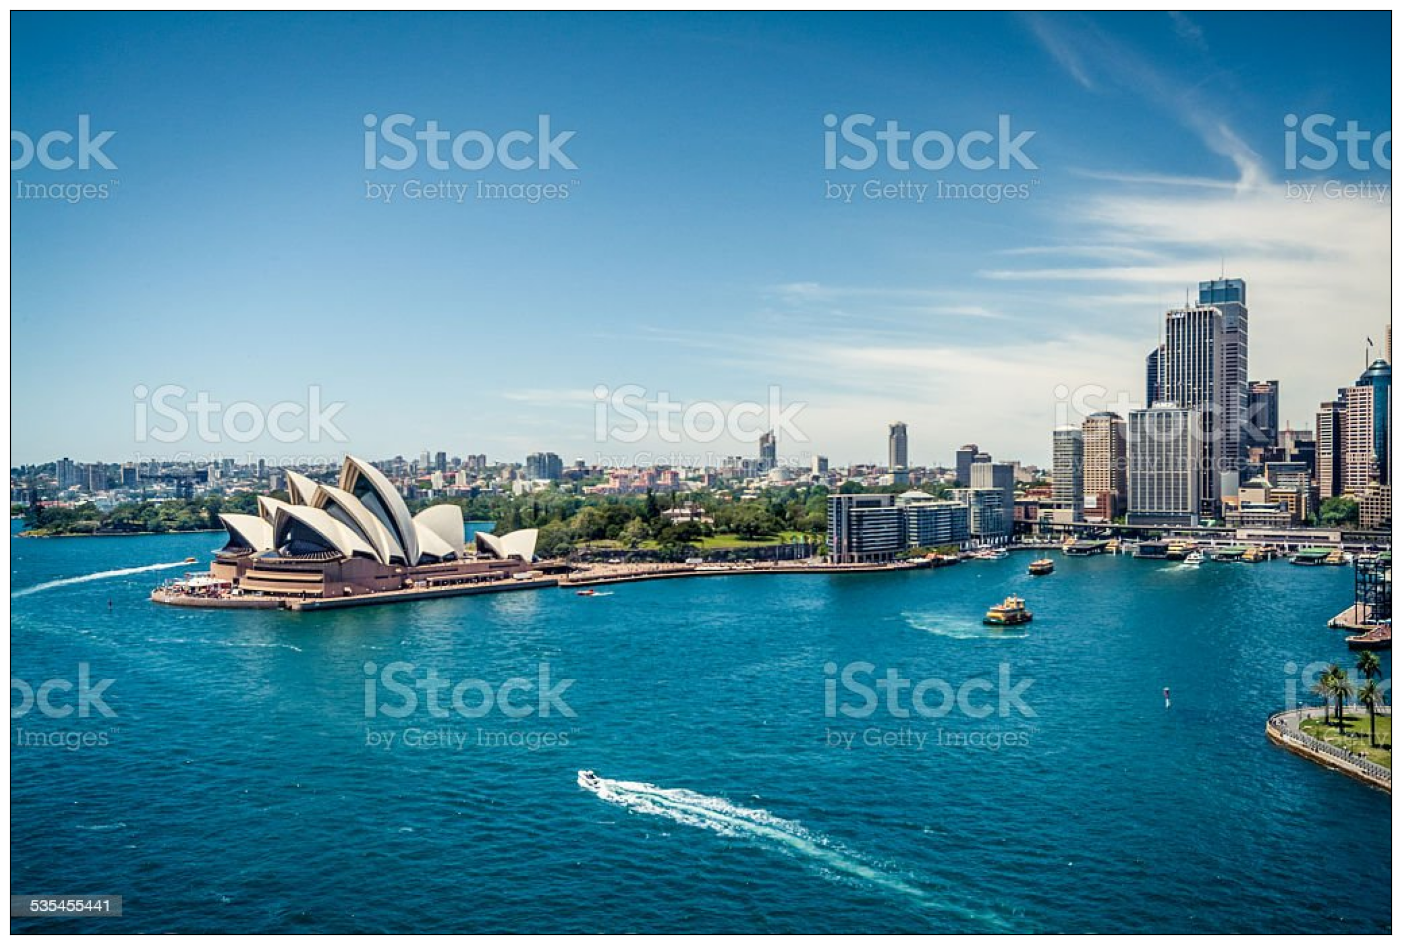

In [15]:
plt.rcParams['figure.figsize'] = (20, 12)
image = io.imread('images/sydney.jpeg')
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(image);

In [16]:
rows = image.shape[0]
cols = image.shape[1]
image = image.reshape(rows*cols, 3)

(685, 1024, 3)


In [25]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(image)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [36]:
print(image)

[[  1  98 149]
 [  1  98 149]
 [  1  98 149]
 ...
 [  0  42  62]
 [  1  52  73]
 [  0  50  69]]


In [34]:
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

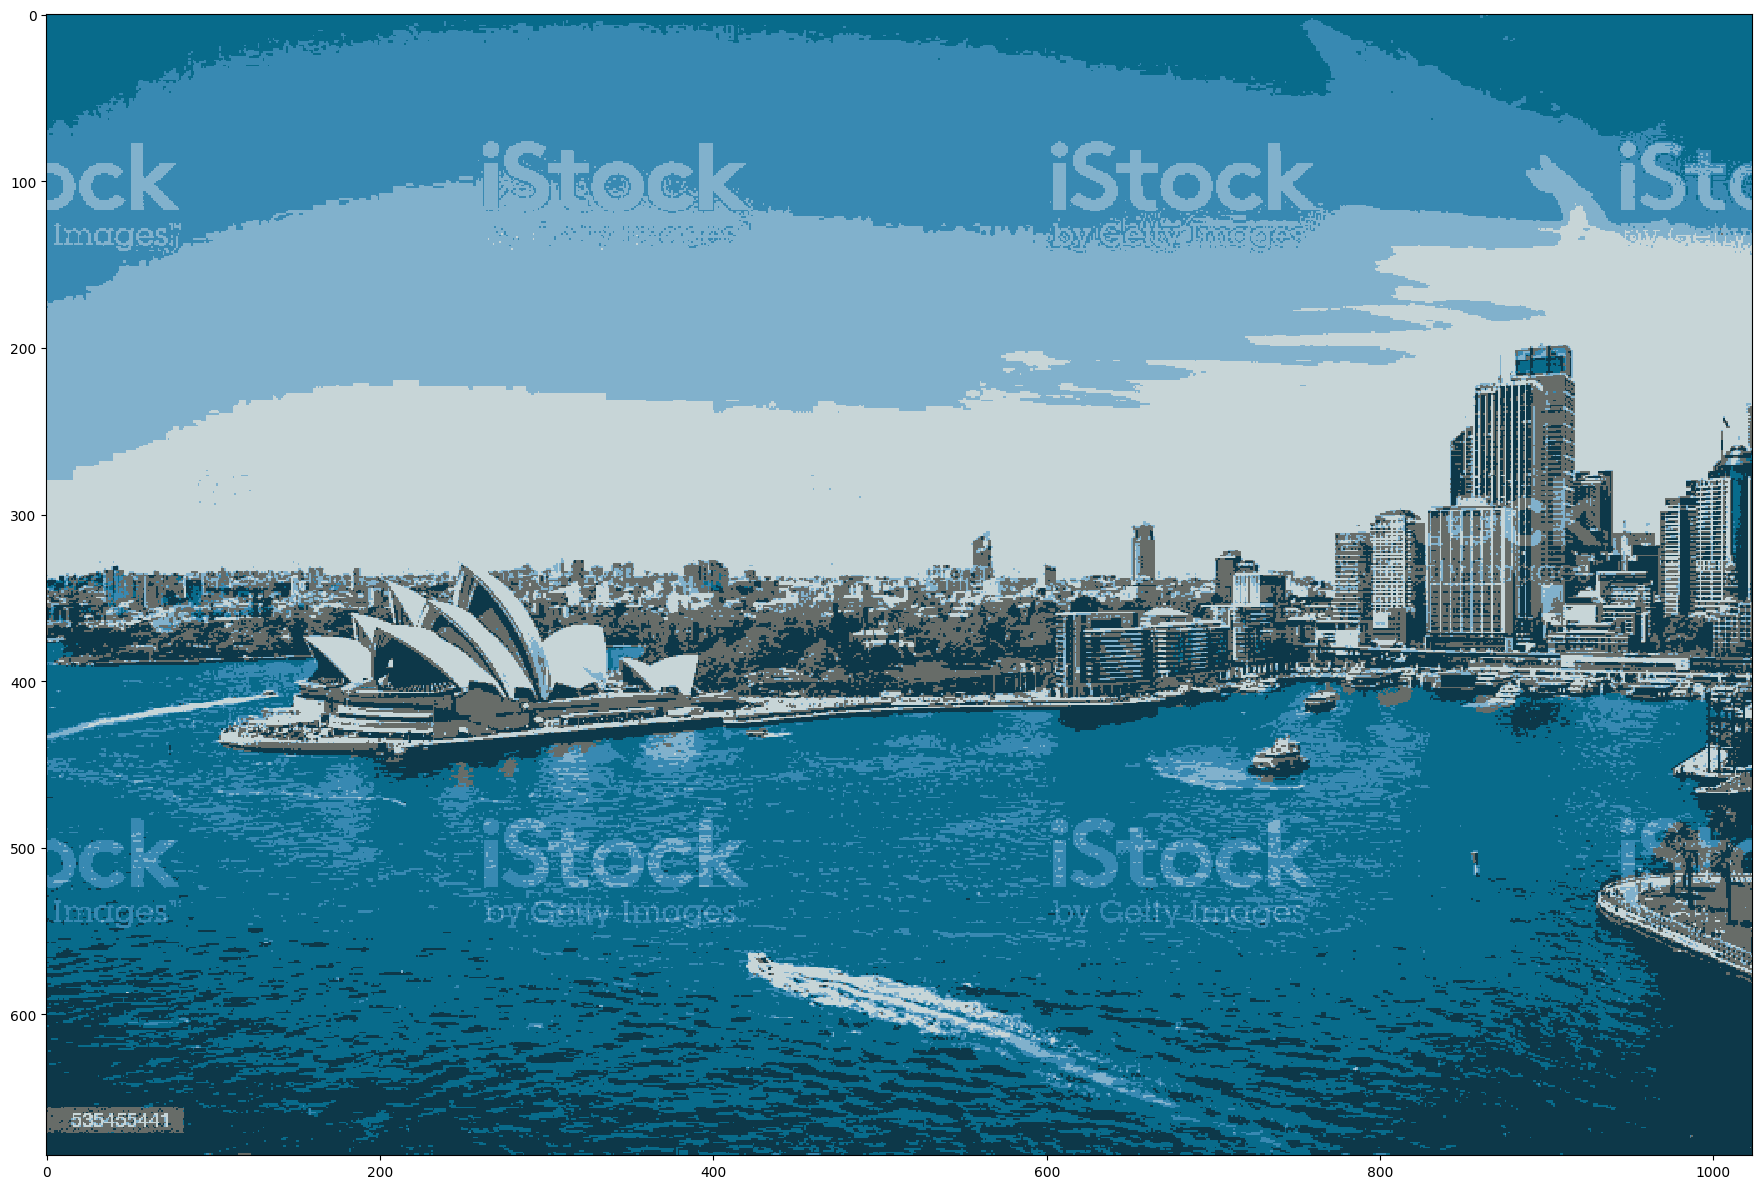

In [35]:
compressed_image = compressed_image.reshape(rows, cols, 3)
io.imsave('compressed_image_64.png', compressed_image)
io.imshow(compressed_image)
io.show()